In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import statistics
import kmax as kx
import utility as util
from hierarchy import *
from scipy.optimize import fsolve
from IPython.core.debugger import set_trace
import scipy.stats as stats
import pylab
import statsmodels.api as sm

In [2]:
def draw_tree(tree, layout, draw_path=True):
    rooted_tree = nx.bfs_tree(tree, 0)
    
    #nx.draw_networkx_nodes(tree, pos=layout, node_size=29)
    nx.draw_networkx_labels(tree, pos=layout, font_size=10, font_color="tab:blue")
    
    if draw_path:
        path_cover,_,X=util.path_cover(tree)
        nx.draw_networkx_edges(rooted_tree, pos=layout, edgelist=path_cover, edge_color="tab:red", arrows=True)
        
        other_edges = [(u,v) for u,v in rooted_tree.edges() if (u,v) not in path_cover and (v,u) not in path_cover]
        nx.draw_networkx_edges(rooted_tree, pos=layout, edgelist=other_edges)
    else:
        nx.draw_networkx_edges(rooted_tree, pos=layout)

# Simulations 3

## Goals:
- Find path segment length for a typical vertex

In [81]:
# Calculate the length of the path passing 
# through `node` in `path_cover`
def path_seg_length(tree, path_cover, node):
    if len(path_cover) == 0:
        return 0
    
    path_subgraph = tree.edge_subgraph(path_cover)
    if node not in path_subgraph:
        return 0

    # node_connected_component returns a list of nodes, so we subtract 1 to get the number of edges
    return len(nx.node_connected_component(path_subgraph, node)) - 1

def all_path_seg_lengths(tree):
    hist_data = {}
    component_root = 0
    path_cover,_,_ = util.path_cover(tree, root=component_root)
    path_subgraph = tree.edge_subgraph(path_cover)
    for path in nx.connected_components(path_subgraph):
        seg_len = len(path) - 1
        if seg_len not in hist_data:
            hist_data[seg_len] = 1
        else:
            hist_data[seg_len] += 1
    
    #seg_lengths = {node : path_seg_length(tree, path_covers[node], node) for node in tree.nodes()}

    return hist_data

In [85]:
n = 20
lam = 0.7
#sample_tree = nx.fast_gnp_random_graph(n, lam/n)
sample_tree = nx.random_labeled_tree(n)
for u,v in sample_tree.edges():
    sample_tree[u][v]['weight'] = 1

seg_length_counts = all_path_seg_lengths(sample_tree)

In [86]:
seg_length_counts

{4: 1, 2: 4, 1: 1}

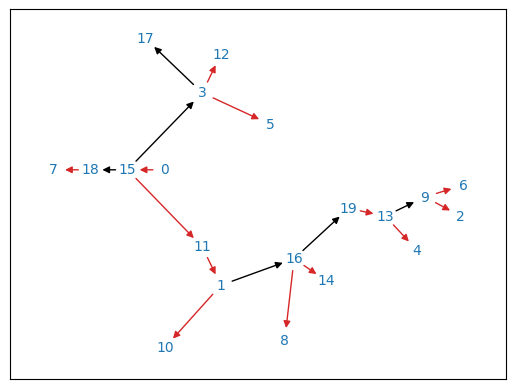

In [87]:
draw_tree(sample_tree, hierarchyc_pos(sample_tree, root=0))

In [76]:
num_samples = 10000
seg_lengths = []
LAM = 0.7
for _ in range(num_samples):
    # Poisson Branching
    sample_tree = nx.Graph(GWBP(LAM, MAXLEVEL=100))
    for u,v in sample_tree.edges():
        sample_tree[u][v]['weight'] = 1

    seg_lengths += all_path_seg_lengths(sample_tree).values()

In [30]:
def generate_histogram(dataset, bins = np.arange(0,100,1)):
    plt.figure(figsize=(6,6))
    plt.hist(dataset, bins=bins, edgecolor = 'black', linewidth=1.2, color = 'lightblue')
    plt.title("Path segment length histogram", fontfamily=['Serif'])
    plt.xlabel("Path length in optimal path cover", fontfamily=['Serif'], fontsize=12)
    plt.ylabel("Occurences", fontfamily=['Serif'], fontsize=12)
    plt.show()

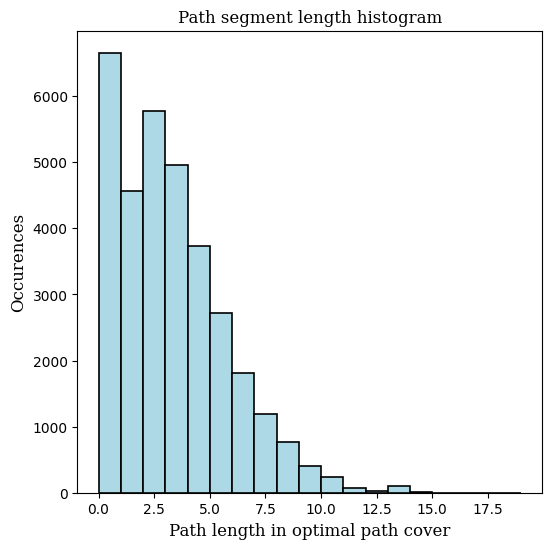

In [31]:
generate_histogram(seg_lengths, bins=np.arange(0,20,1))